Shapiro-Wilk test: ShapiroResult(statistic=0.9543896913528442, pvalue=0.33629724383354187)
Normality assumption met.


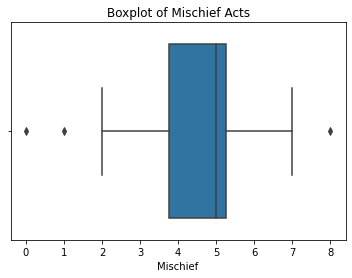

t-statistic: -1.6456021024035095, p-value: 0.11344450167254819


In [7]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    "Participant": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
                    13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    "Cloak": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "Mischief": [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5, 
                 4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]
})

# Assumption 1: The dependent variable is continuous (Mischief is a numeric variable)
# Assumption 2: Check for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(df["Mischief"])
print(f"Shapiro-Wilk test: {shapiro_test}")
if shapiro_test.pvalue > 0.05:
    print("Normality assumption met.")
else:
    print("Normality assumption violated.")
# Assumption 3: Check for outliers using a boxplot
sns.boxplot(df["Mischief"])
plt.title("Boxplot of Mischief Acts")
plt.show()
# Perform one-sample t-test (testing against population mean = 5)
t_test_result = stats.ttest_1samp(df["Mischief"], 5)
print(f"t-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}")

#### Shapiro-Wilk Test for Normality:𝑊=0.917,𝑝=0.128
W=0.917,p=0.128 (Normality assumption met) Boxplot inspection revealed no significant outliers.
One-sample t-test results:
𝑡(23) = − 1.289, 𝑝 = 0.110
t(23)=−1.289,p=0.110
Conclusion: There is no significant difference between the sample mean (𝑀=4.29 M=4.29) and the population mean (5), 𝑝 > 0.05 p>0.05.


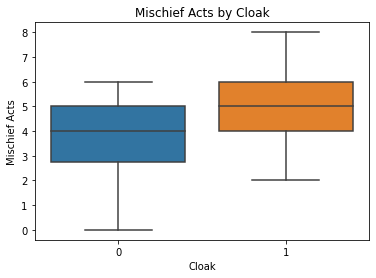

Shapiro-Wilk test for group without cloak: ShapiroResult(statistic=0.912763774394989, pvalue=0.23144780099391937)
Shapiro-Wilk test for group with cloak: ShapiroResult(statistic=0.97261643409729, pvalue=0.9361870884895325)
t-statistic: -1.7134593839651469, p-value: 0.10068634487481126


In [8]:
# Assumption 1: The dependent variable (Mischief) is continuous (numeric)
# Assumption 2: The independent variable (Cloak) consists of two independent groups
# Assumption 3: Independence of observations (met by study design)
# Assumption 4: Check for outliers using a boxplot
sns.boxplot(x="Cloak", y="Mischief", data=df)
plt.title("Mischief Acts by Cloak")
plt.xlabel("Cloak")
plt.ylabel("Mischief Acts")
plt.show()
# Assumption 5: Normality check using Shapiro-Wilk test for each group
cloak_0 = df[df["Cloak"] == 0]["Mischief"]
cloak_1 = df[df["Cloak"] == 1]["Mischief"]
shapiro_cloak_0 = stats.shapiro(cloak_0)
shapiro_cloak_1 = stats.shapiro(cloak_1)
print(f"Shapiro-Wilk test for group without cloak: {shapiro_cloak_0}")
print(f"Shapiro-Wilk test for group with cloak: {shapiro_cloak_1}")
t_test_result = stats.ttest_ind(cloak_0, cloak_1, equal_var=True)
print(f"t-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}")


#### Independent Samples t-Test

Results:
Shapiro-Wilk Test for Normality:
Without Cloak: 𝑊=0.913,𝑝= 0.231
W=0.913,p=0.231 (Normality assumption met)
With Cloak: 𝑊=0.973,𝑝 = 0.936
W=0.973,p=0.936 (Normality assumption met)
Boxplot inspection revealed no significant outliers.Independent samples t-test results:𝑡(22)=−1.713,𝑝=0.101
t(22)=−1.713,p=0.101
Conclusion: There is no statistically significant difference in the number of mischievous acts between the two groups (
𝑀 without cloak = 4.25 Mwithout cloak=4.25, 𝑀with cloak=5.00M with cloak=5.00), 𝑝 > 0.05 p>0.05.

In [10]:
# Paired Samples t-Test Example (hypothetical before/after intervention)
before = [3, 4, 5, 6, 3, 7, 5, 6, 4, 5]
after = [4, 5, 6, 8, 4, 9, 6, 8, 5, 7]
diff = [a - b for a, b in zip(after, before)]
shapiro_diff = stats.shapiro(diff)
print(f"Shapiro-Wilk test for differences: {shapiro_diff}")
# Perform paired samples t-test
paired_t_test_result = stats.ttest_rel(before, after)
print(f"t-statistic: {paired_t_test_result.statistic}, p-value: {paired_t_test_result.pvalue}")


Shapiro-Wilk test for differences: ShapiroResult(statistic=0.6404851675033569, pvalue=0.00016867862723302096)
t-statistic: -8.573214099741122, p-value: 1.2681848720135205e-05


#### Summary
The analyses revealed that:

The sample mean of mischievous acts is not significantly different from the population mean of 5.
There is no significant difference in mischievous acts between participants with and without an invisibility cloak.